# Data Collection
> ## Download the Dataset

# Image Pre-Processing

> ## Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile as zf
import os
import random
import cv2
import pickle
from imutils import build_montages
from imutils import paths
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from skimage import feature
from google.colab.patches import cv2_imshow

In [ ]:
sns.set()
os.getcwd()

'/content'

> ## Loading the training and testing dataset

In [ ]:
handle_spiral = zf.ZipFile(r'dataset1.zip')
handle_spiral.extractall('dataset1')
handle_spiral.close()

handle_wave = zf.ZipFile(r'dataset1.zip')
handle_wave.extractall('dataset1')
handle_wave.close()

In [ ]:
spiral_train_healthy = os.listdir('dataset1/dataset/spiral/training/healthy/')
spiral_train_park = os.listdir('dataset1/dataset/spiral/training/parkinson/')

fp_spiral_train_healthy = 'dataset1/dataset/spiral/training/healthy/'
fp_spiral_train_park = 'dataset1/dataset/spiral/training/parkinson/'

spiral_test_healthy = os.listdir('dataset1/dataset/spiral/testing/healthy/')
spiral_test_park = os.listdir('dataset1/dataset/spiral/testing/parkinson/')

fp_spiral_test_healthy = 'dataset1/dataset/spiral/testing/healthy/'
fp_spiral_test_park = 'dataset1/dataset/spiral/testing/parkinson/'




In [ ]:
wave_train_healthy = os.listdir('dataset1/dataset/wave/training/healthy/')
wave_train_park = os.listdir('dataset1/dataset/wave/training/parkinson/')

fp_wave_train_healthy = 'dataset1/dataset/wave/training/healthy/'
fp_wave_train_park = 'dataset1/dataset/wave/training/parkinson/'

wave_test_healthy = os.listdir('dataset1/dataset/wave/testing/healthy/')
wave_test_park = os.listdir('dataset1/dataset/wave/testing/parkinson/')

fp_wave_test_healthy = 'dataset1/dataset/wave/testing/healthy/'
fp_wave_test_park = 'dataset1/dataset/wave/testing/parkinson/'


> ## Quantifying Images

In [ ]:
def quantify_image(image):
  features = feature.hog(image,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features

In [ ]:
def quantify_image(image_wave):
  features_wave = feature.hog(image_wave,orientations=9,
                pixels_per_cell=(10,10),cells_per_block=(2,2),transform_sqrt=True,block_norm="L1")

  return features_wave

> ## Splitting up of training and testing data

In [ ]:
trainX = []
testX = []
outputs = []
trainY = []
testY = []

for i in spiral_train_healthy:
  image = cv2.imread(fp_spiral_train_healthy+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image =cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('healthy')

for i in spiral_train_park:
  image = cv2.imread(fp_spiral_train_park+i)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  trainX.append(features)
  trainY.append('parkinson')

for i in spiral_test_healthy:
  image = cv2.imread(fp_spiral_test_healthy+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('healthy')

for i in spiral_test_park:
  image = cv2.imread(fp_spiral_test_park+i)
  outputs.append(image)
  image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image , (200,200))
  image = cv2.threshold(image ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features = quantify_image(image)
  testX.append(features)
  testY.append('parkinson')
    

In [ ]:
trainX_wave = []
testX_wave = []
outputs_wave = []
trainY_wave = []
testY_wave = []

for i in wave_train_healthy:
  image_wave = cv2.imread(fp_wave_train_healthy+i)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave , (200,200))
  image_wave =cv2.threshold(image_wave, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  trainX_wave.append(features_wave)
  trainY_wave.append('healthy')

for i in wave_train_park:
  image_wave = cv2.imread(fp_wave_train_park+i)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave , (200,200))
  image_wave = cv2.threshold(image_wave ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  trainX_wave.append(features_wave)
  trainY_wave.append('parkinson')

for i in wave_test_healthy:
  image_wave = cv2.imread(fp_wave_test_healthy+i)
  outputs_wave.append(image_wave)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave , (200,200))
  image_wave = cv2.threshold(image_wave ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  testX_wave.append(features_wave)
  testY_wave.append('healthy')

for i in wave_test_park:
  image_wave = cv2.imread(fp_wave_test_park+i)
  outputs_wave.append(image_wave)
  image_wave = cv2.cvtColor(image_wave , cv2.COLOR_BGR2GRAY)
  image_wave = cv2.resize(image_wave, (200,200))
  image_wave = cv2.threshold(image_wave ,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
  features_wave = quantify_image(image_wave)
  testX_wave.append(features_wave)
  testY_wave.append('parkinson')

In [ ]:
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

In [ ]:
trainX_wave = np.array(trainX_wave)
testX_wave = np.array(testX_wave)
trainY_wave = np.array(trainY_wave)
testY_wave = np.array(testY_wave)

In [ ]:
trainX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
trainX_wave

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12675901, 0.        , 0.07381472, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
trainY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [ ]:
trainY_wave

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson'], dtype='<U9')

In [ ]:
testX

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
testX_wave

array([[0.01075467, 0.        , 0.01520941, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
testY

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

In [ ]:
testY_wave

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson', 'parkinson', 'parkinson',
       'parkinson', 'parkinson', 'parkinson'], dtype='<U9')

> ## Label Encoding

In [ ]:
le = LabelEncoder()
trainY = le.fit_transform(trainY)
testY = le.transform(testY)
print(trainX.shape,trainY.shape)

(72, 12996) (72,)


In [ ]:
trainY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
testY

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
le = LabelEncoder()
trainY_wave = le.fit_transform(trainY_wave)
testY_wave = le.transform(testY_wave)
print(trainX_wave.shape,trainY_wave.shape)

(72, 12996) (72,)


In [ ]:
trainY_wave

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
testY_wave

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

# Model Building

> ## Training the model

In [ ]:
print("Training model....for Spiral Data")
model = RandomForestClassifier(n_estimators=100)
model.fit(trainX,trainY)

Training model....for Spiral Data


RandomForestClassifier()

In [ ]:
print("Training model....for Wave Data")
model_wave = RandomForestClassifier(n_estimators=100)
model_wave.fit(trainX_wave,trainY_wave)

Training model....for Wave Data


RandomForestClassifier()

In [ ]:
preds = model.predict(testX)
preds

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
preds_wave = model_wave.predict(testX_wave)
preds_wave

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

> ## Model Evaluation

In [ ]:
cnf = confusion_matrix(testY,preds)
cnf

array([[14,  1],
       [ 3, 12]])

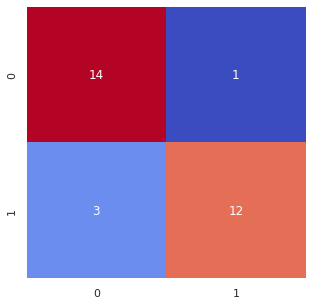

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [ ]:
acc = metrics.accuracy_score(testY,preds)
acc

0.8666666666666667

In [ ]:
indexes = np.random.randint(0,30,25)
indexes

array([18, 14, 23, 11, 21,  1,  8, 24,  2, 18, 29, 24,  9,  1, 14, 23,  8,
       29,  2,  6, 22, 27, 27,  1,  0])

In [ ]:
cnf_wave = confusion_matrix(testY_wave,preds_wave)
cnf_wave

array([[10,  5],
       [ 4, 11]])

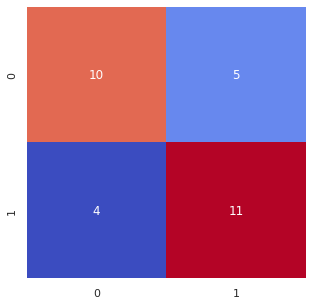

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cnf_wave , annot=True , cmap="coolwarm" , cbar=False)
plt.show()

In [ ]:
acc_wave = metrics.accuracy_score(testY_wave,preds_wave)
acc_wave

0.7

In [ ]:
indexes_wave = np.random.randint(0,30,25)
indexes_wave

array([15, 18,  4, 12,  6,  8, 20, 18,  3,  3, 18, 28,  0, 14, 29, 23,  4,
       16,  1,  4, 23, 17,  1,  4,  4])

> ## Testing the Model

In [ ]:
testpath=list(paths.list_images(fp_spiral_train_healthy))
idxs=np.arange(0,len(testpath))
idxs=np.random.choice(idxs,size=(25,),replace=False)
images=[]

for i in idxs:
    image=cv2.imread(testpath[i])
    output=image.copy()
    output=cv2.resize(output,(128,128))
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=cv2.resize(image,(200,200))
    image=cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features= quantify_image(image)
    preds=model.predict([features])
    label=le.inverse_transform(preds)[0]
    if label=="healthy":
      color=(0,255,0) 
    else:
      (0,0,255)
    cv2.putText(output,label, (3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    images.append(output)

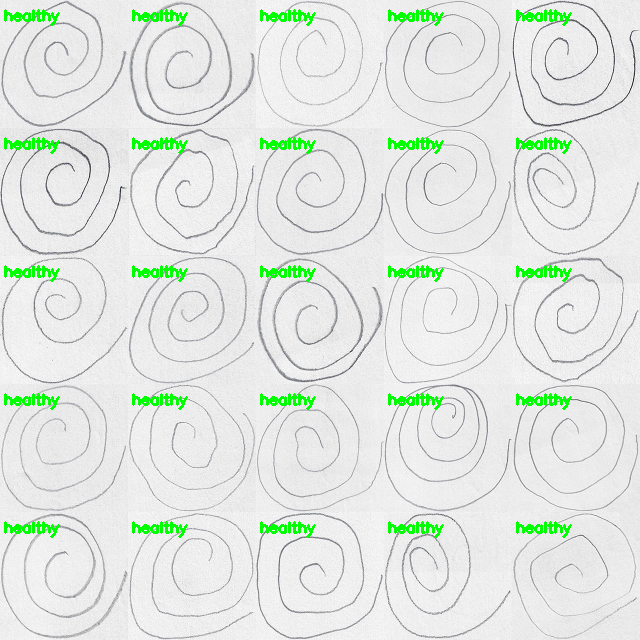

-1

In [ ]:
'''montage = build_montages(images,(128,128),(5,5))[0]
cv2.imshow(montage)
cv2.waitKey(0)'''

montage=build_montages(images,(128,128),(5,5))[0]
cv2_imshow(montage)
cv2.waitKey(0)


In [ ]:
testpath_wave=list(paths.list_images(fp_wave_train_healthy))
idxs_wave=np.arange(0,len(testpath_wave))
idxs_wave=np.random.choice(idxs_wave,size=(25,),replace=False)
images_wave=[]

for i in idxs_wave:
    image_wave=cv2.imread(testpath_wave[i])
    output_wave=image_wave.copy()
    output_wave=cv2.resize(output_wave,(128,128))
    image_wave=cv2.cvtColor(image_wave,cv2.COLOR_BGR2GRAY)
    image_wave=cv2.resize(image_wave,(200,200))
    image_wave=cv2.threshold(image_wave,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    features_wave= quantify_image(image_wave)
    preds_wave=model_wave.predict([features_wave])
    label_wave=le.inverse_transform(preds_wave)[0]
    if label_wave=="healthy":
      color=(0,255,0) 
    else:
      (0,0,255)
    cv2.putText(output_wave,label_wave, (3,20),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    images_wave.append(output_wave)

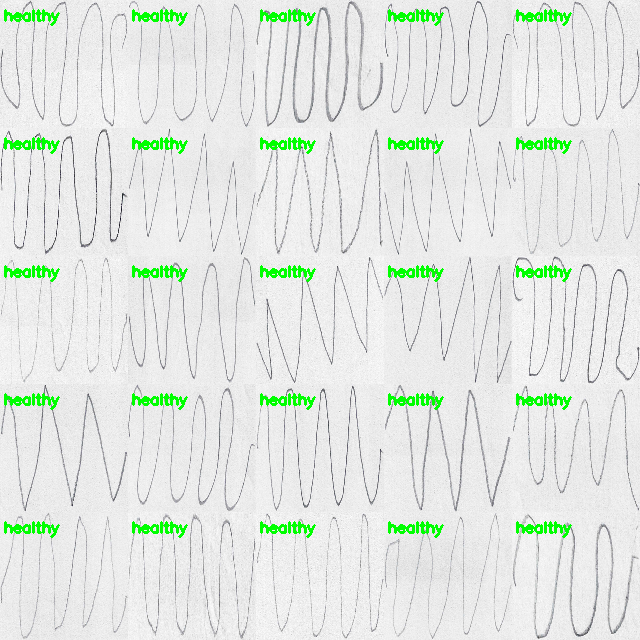

-1

In [ ]:
montage_wave=build_montages(images_wave,(128,128),(5,5))[0]
cv2_imshow(montage_wave)
cv2.waitKey(0)

> ## Predicting the model-Accuracy and Confusion Matrix

In [ ]:
predictions = model.predict(testX)

cm = confusion_matrix(testY, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy = (tp + tn) / float(cm.sum())
print(accuracy)


[14  1  3 12]
0.8666666666666667


In [ ]:
predictions_wave = model_wave.predict(testX_wave)

cm_wave = confusion_matrix(testY_wave, predictions_wave).flatten()
print(cm_wave)
(tn_w, fp_w, fn_w, tp_w) = cm_wave
accuracy_wave = (tp_w + tn_w) / float(cm_wave.sum())
print(accuracy)

[10  5  4 11]
0.8666666666666667


> ## Save the Model

In [ ]:
pickle.dump(model,open('parkinson.pkl','wb')) 